In [1]:
#Cell_1.
%matplotlib notebook
# グラフをインラインで表示
# %matplotlib inline

import warnings
warnings.simplefilter('ignore')

import gc
import math
import pickle

import mylibs.mylib1 as mylib1
import mylibs.mylib2 as mylib2
import mylibs.mylib3 as mylib3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# 表示する行・列の数を設定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

# matplotlib のフォントを設定
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'

# pd.DataFrame の表示行数・列数を指定
pd.options.display.max_rows = 8
pd.options.display.max_columns = 12

### 血圧分類属性付き加入者情報データ

In [2]:
#Cell_2.
df_info = pd.read_csv('./pseudo_medical/records/incl_bp/info.csv')

print(df_info.shape)
df_info.head()

(4815, 8)


,iid,sex,family,birth_ym,start_obs_ym,end_obs_ym,death,bp_class
0,i000000,M,1,1952/06,2010/01,2013/09,0,1
1,i000001,F,2,1972/11,2010/01,2019/12,0,0
2,i000002,M,1,1978/03,2010/01,2016/09,0,0
3,i000003,M,2,1989/03,2010/01,2013/12,0,0
4,i000006,M,1,1973/11,2010/04,2013/09,0,0


### 月次入院発生率

In [3]:
#Cell_3.
df_admission = pd.read_csv('./public_stats/processed/ps_admission.csv')
display(df_admission)

,sex,alb_min,alb_max,A00,C00,D50,...,N00,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.015865,0.000000,0.000000,0.000000
1,M,1.0,4.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.001291,0.000000,0.001291
2,M,5.0,9.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000969
3,M,10.0,14.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,F,70.0,74.0,0.000000,0.003797,0.00000,...,0.000633,0.0,0.000000,0.000000,0.000000,0.001266
35,F,75.0,79.0,0.000000,0.004194,0.00000,...,0.000699,0.0,0.000000,0.000000,0.000000,0.002796
36,F,80.0,84.0,0.000831,0.004155,0.00000,...,0.001662,0.0,0.000000,0.000000,0.000831,0.004155
37,F,85.0,130.0,0.000690,0.003448,0.00069,...,0.002069,0.0,0.000000,0.000000,0.000690,0.006206


In [4]:
#Cell_4.
df_admission = pd.read_csv('./public_stats/processed/ps_admission.csv')
df_admission_cumrate = mylib2.make_admission_cumrate(df_admission)

print(df_admission_cumrate.shape)
df_admission_cumrate.head()

(32, 22)


,sex,alb_min,alb_max,A00,C00,D50,...,N00,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.0,0.0,0.0,...,0.005288,0.005288,0.021153,0.021153,0.021153,0.021153
1,M,1.0,4.0,0.0,0.0,0.0,...,0.002581,0.002581,0.002581,0.003872,0.003872,0.005163
2,M,5.0,9.0,0.0,0.0,0.0,...,0.000969,0.000969,0.000969,0.000969,0.000969,0.001938
3,M,10.0,14.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000937
4,M,15.0,19.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000847


### 月次外来発生率

In [5]:
#Cell_5.
df_outpatient = pd.read_csv('./public_stats/processed/ps_outpatient.csv')

print(df_outpatient.shape)
df_outpatient.head()

(38, 22)


,sex,alb_min,alb_max,A00,C00,D50,...,N00,O00,P00,Q00,R00,S00
0,M,0.0,0.0,0.068748,0.010577,0.005288,...,0.010577,0.0,0.052883,0.063460,0.042307,0.037018
1,M,1.0,4.0,0.101963,0.002581,0.003872,...,0.010325,0.0,0.006453,0.019360,0.019360,0.064533
2,M,5.0,9.0,0.092074,0.004846,0.001938,...,0.007754,0.0,0.000969,0.006784,0.014538,0.066875
3,M,10.0,14.0,0.051562,0.003750,0.001875,...,0.002812,0.0,0.000000,0.005625,0.011250,0.105936
4,M,15.0,19.0,0.019475,0.003387,0.001693,...,0.003387,0.0,0.000000,0.002540,0.005927,0.070280


### 平均在院日数

In [6]:
#Cell_6.
df_days = pd.read_csv('./public_stats/processed/ps_days.csv')
less_age_75 = (df_days.alb_max < 75)
df_days = df_days.loc[less_age_75]

print(df_days.shape)
df_days.head()

(32, 22)


,sex,alb_min,alb_max,A00,C00,D50,...,N00,O00,P00,Q00,R00,S00
0,M,0.0,0.0,4.5,9.3,9.1,...,6.7,0.0,11.3,16.1,4.0,2.6
1,M,1.0,4.0,3.8,12.1,8.4,...,8.8,0.0,38.7,7.5,3.1,1.7
2,M,5.0,9.0,7.7,16.0,11.0,...,9.6,0.0,8.2,7.6,2.9,4.1
3,M,10.0,14.0,3.9,19.2,9.0,...,7.4,0.0,5.2,16.7,4.8,7.8
4,M,15.0,19.0,5.3,15.2,16.3,...,7.6,0.0,0.0,22.4,3.2,8.2


Text(0.5, 1.0, 'Assumption of Dose-Response Ratio')

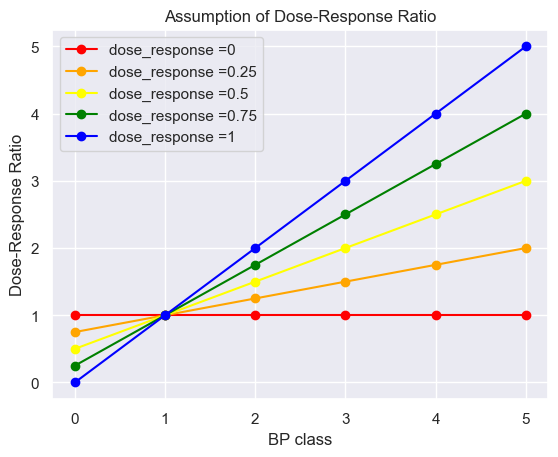

In [7]:
%matplotlib inline
#Cell_7.
import seaborn as sns
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111)

bp_class = np.arange(6)
grads = [0, 0.25, 0.5, 0.75, 1]
colors = ['red', 'orange', 'yellow', 'green', 'blue']
for (dose_response, c) in zip(grads, colors):
    dose_response_ratio = (bp_class - 1) * dose_response + 1
    ax.plot(bp_class, dose_response_ratio, c=c, marker='o',
            label='dose_response ='+str(dose_response))

ax.legend(loc='best')
ax.set_xlabel('BP class')
ax.set_ylabel('Dose-Response Ratio')
ax.set_title('Assumption of Dose-Response Ratio')

## 関数の定義

In [8]:
#Cell_8.
def get_info_for_i(df_info, i):
    cols = ['iid', 'sex', 'birth_ym', 'start_obs_ym', 'end_obs_ym', 'bp_class']
    (iid, sex, birth_ym, start_obs_ym,
     end_obs_ym, bp_class) = df_info.iloc[i][cols]
    birth_t = mylib1.ym_to_t(birth_ym)
    start_obs_t = mylib1.ym_to_t(start_obs_ym)
    end_obs_t = mylib1.ym_to_t(end_obs_ym)
    return (iid, sex, birth_t, start_obs_t, end_obs_t, bp_class)


i = 0
(iid, sex, birth_t, start_obs_t, end_obs_t, bp_class) = get_info_for_i(df_info, i)

### 関数を組み合わせてコードを組む

In [ ]:
#Cell_9.
import csv


dict_csv_paths = {'common': './pseudo_medical/records/incl_bp/commons.csv',
                  'disease': './pseudo_medical/records/incl_bp/diseases.csv',
                  'treatment': './pseudo_medical/records/incl_bp/treatments.csv'}

commons_csv = open(dict_csv_paths['common'], 'w')
open_common_object = csv.writer(commons_csv)
cols = ['iid', 'rid', 'ym', 'receipt_type', 'admission_ym', 'days']
open_common_object.writerow(cols)

diseases_csv = open(dict_csv_paths['disease'], 'w')
open_disease_object = csv.writer(diseases_csv)
cols = ['iid', 'rid', 'first_ym', 'icd10_code']
open_disease_object.writerow(cols)

treatments_csv = open(dict_csv_paths['treatment'], 'w')
open_treatment_object = csv.writer(treatments_csv)
cols = ['iid', 'rid', 'treatment_code']
open_treatment_object.writerow(cols)

dose_response = 0.75  # <-- 追加
rid = 'r00000000'
rs = 0


for i in np.arange(len(df_info)):  # df_info を上から順に参照
    gc.collect()
    # df_info の i 番目の (iid, sex, birth_t, start_obs_t, end_obs_t) を取得
    (iid, sex, birth_t, start_obs_t, end_obs_t, bp_class) = get_info_for_i(df_info, i)
    t = start_obs_t
    while start_obs_t <= t <= end_obs_t:
        alb = int(t - birth_t)
        # 入院累積発生率の pd.Series を取得
        ss_adm_cumrate = mylib2.get_ss_admission_cumrate(
            df_admission_cumrate, sex, alb)
        # 入院用に一様乱数 u(rs) (0 <= r <= 1)を生成 & ランダムシード更新
        (u, rs) = mylib2.get_random_num_for_adm(rs)
        # (入院発生？, 入院原因傷病 dis) = 入院乱数シミュレーション(u)
        dose_response_ratio = (bp_class - 1) * dose_response + 1  # <-- 追加
        (does_adm_occur, dis) = mylib2.get_admission_disease(
                                ss_adm_cumrate, u / dose_response_ratio)
        #                                         ---------------------
        #                                                  変更
        if does_adm_occur:
            mu = mylib2.get_avg_hospdays(df_days, sex, alb, dis)
            # 在院日数 days を指数分布(mu) で決定
            (days, rs) = mylib2.get_random_days(mu, rs)
            # 入院発生年月、入院は全て月央に発生すると仮定
            admission_ym = mylib1.t_to_ym(t)
            # 月をまたぐ継続入院でなくても次のコードブロックを実行
            does_hosp_continue = True
            m = 0  # 初月入院を 0、次月から月をまたぐごとに +1
            while does_hosp_continue:
                ym = mylib1.t_to_ym(t)
                rid = mylib2.make_new_rid(rid)
                # 共通レコード(入院)の発行
                # 共通レコード(入院)の作成
                df_common = mylib2.create_df_common_inpatient_after_m_months(
                            iid, rid, ym, admission_ym, days, m)
                mylib2.add_df_xxx_on_csv(open_common_object, df_common)
                # 傷病レコードの発行
                df_disease = mylib2.create_df_disease(iid, rid, admission_ym, dis)
                mylib2.add_df_xxx_on_csv(open_disease_object, df_disease)
                # 診療行為レコード(入院)の発行
                df_treatment = mylib2.create_df_treatment(iid, rid, 'A100')
                mylib2.add_df_xxx_on_csv(open_treatment_object, df_treatment)
                # 診療行為レコード(手術)を入院の 10% に発行
                (u, rs) = mylib2.get_random_num_for_adm(rs)
                if u <= 0.1:
                    df_treatment = mylib2.create_df_treatment(iid, rid, 'K000')
                    mylib2.add_df_xxx_on_csv(open_treatment_object, df_treatment)

                t = t + 1 / 12  # t を１ヶ月ずらす
                does_hosp_continue = (days - 15 - 30 * m > 0)
                m = m + 1

        else:  # 入院発生なし
            # 外来発生率 out(sex, alb) を取得
            ss_out_rate = mylib2.get_outpatient_rate(df_outpatient, sex, alb)
            # 外来用に一様乱数 u(rs) (0 <= r <= 1)を生成 & ランダムシード更新
            (us, rs) = mylib2.get_random_num_for_out(rs)
            us = us / dose_response_ratio  # <-- 追加
            # (外来発生？, 複数外来原因傷病 diss) = 外来乱数シミュレーション(u)
            (does_occur_outpatient, diss) \
                = mylib2.get_outpatient_diseases(ss_out_rate, us)
            if does_occur_outpatient:
                # 外来発生年月、外来は全て月央に発生すると仮定
                ym = mylib1.t_to_ym(t)
                for dis in diss:
                    rid = mylib2.make_new_rid(rid)
                    # 共通レコード(外来)の発行
                    # 共通レコード(外来) df_common(iid, rid, ym) の作成
                    df_common = mylib2.create_df_common(iid, rid, ym,
                                                      'outpatient', '-', 1)
                    mylib2.add_df_xxx_on_csv(open_common_object, df_common)
                    # 傷病レコードの発行
                    df_disease = mylib2.create_df_disease(iid, rid, ym, dis)
                    mylib2.add_df_xxx_on_csv(open_disease_object, df_disease)
                    # 診療行為レコード(外来)の発行
                    df_treatment = mylib2.create_df_treatment(iid, rid, 'A000')
                    mylib2.add_df_xxx_on_csv(open_treatment_object, df_treatment)
                    df_treatment = mylib2.create_df_treatment(iid, rid, 'F000')
                    mylib2.add_df_xxx_on_csv(open_treatment_object, df_treatment)
                    # 診療行為レコード(手術)を外来の 1% に発行
                    (u, rs) = mylib2.get_random_num_for_adm(rs)
                    if u <= 0.01:
                        df_treatment = mylib2.create_df_treatment(iid, rid, 'K000')
                        mylib2.add_df_xxx_on_csv(open_treatment_object, df_treatment)

            t = t + 1 / 12  # t を１ヶ月ずらす

commons_csv.close()
diseases_csv.close()
treatments_csv.close()

In [ ]:
df_common = pd.read_csv('./pseudo_medical/records/incl_bp/commons.csv')

print(df_common.shape)
df_common.head()

In [ ]:
df_diseases = pd.read_csv('./pseudo_medical/records/incl_bp/diseases.csv')

print(df_diseases.shape)
df_diseases.head()

In [ ]:
df_treatments = pd.read_csv('./pseudo_medical/records/incl_bp/treatments.csv')

print(df_treatments.shape)
df_treatments.head()

In [ ]:
df_info.groupby(['bp_class'])['iid'].count() / len(df_info)